In [398]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as  plt
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Dense, Flatten, Reshape


In [400]:
data = pd.read_csv("../../data/csv_files/at200.csv")

In [401]:
data.shape

(104852, 22)

In [404]:
data.head()

,Date Time,Actual Conductivity (ÂµS/cm),Specific Conductivity (ÂµS/cm),Salinity (psu),Resistivity (â„¦-cm),Density (g/cmÂ³),Total Dissolved Solids (mg/L),pH (pH),pH MV (mV),ORP (mV),...,Partial Pressure Oâ‚‚ (psi),Temperature (C),External Voltage (V),Pressure (psi),Depth (m),Level: Depth to Water (m),station_id,Level: Elevation (m),easting,northing
0,2023-01-11 14:34:00.000,161.135101,169.814270,0.089782,6205.972656,0.998789,110.379279,6.345863,33.323765,242.252640,...,1.728853,17.324095,15.786,1.576587,1.299949,2.264972,FPZ_04A,NaN,1383303.353,3875869.513
1,2023-01-11 14:39:00.000,161.549484,169.920212,0.089823,6190.053711,0.998772,110.448137,6.392928,30.763149,241.012863,...,1.653776,17.420801,15.813,1.575842,1.299401,2.177014,FPZ_04A,NaN,1383303.353,3875869.513
2,2023-01-12 00:00:00.000,160.563217,167.590134,0.088505,6228.076660,0.998702,108.933590,6.545794,22.439957,233.128357,...,1.121557,17.804754,15.777,1.577938,1.300915,2.175540,FPZ_04A,NaN,1383303.353,3875869.513
3,2023-01-13 00:00:00.000,160.465378,167.549561,0.088486,6231.874023,0.998705,108.907215,6.533609,23.105145,233.137894,...,1.053462,17.786329,15.804,1.586493,1.306872,2.169526,FPZ_04A,NaN,1383303.353,3875869.513
4,2023-01-14 00:00:00.000,160.041122,167.145935,0.088271,6248.394043,0.998707,108.644858,6.524963,23.577213,230.408005,...,1.064563,17.774521,15.786,1.592077,1.310799,2.165600,FPZ_04A,NaN,1383303.353,3875869.513


In [406]:
data.isna().sum()

Date Time                              0
Actual Conductivity (ÂµS/cm)       59688
Specific Conductivity (ÂµS/cm)     59140
Salinity (psu)                      7102
Resistivity (â„¦-cm)               59696
Density (g/cmÂ³)                   59693
Total Dissolved Solids (mg/L)       7105
pH (pH)                             6555
pH MV (mV)                          6587
ORP (mV)                           54506
DO (mg/L)                          54505
% Saturation Oâ‚‚ (% sat)            319
Partial Pressure Oâ‚‚ (psi)          703
Temperature (C)                    54497
External Voltage (V)               55017
Pressure (psi)                     54507
Depth (m)                          54415
Level: Depth to Water (m)          55015
station_id                             0
Level: Elevation (m)              104851
easting                            11322
northing                           11322
dtype: int64

In [408]:
del(data["Level: Elevation (m)"])

In [410]:
station_data = data[data['station_id'] == "FSB_097D"]
station_data.shape

(9211, 21)

In [412]:
station_data = station_data.dropna()
station_data.shape

(3111, 21)

In [414]:
date_time = station_data["Date Time"]

In [416]:
input_data = station_data.drop(columns = ['pH (pH)', "Date Time", "station_id"])
output_data = station_data['pH (pH)']
input_data.shape, output_data.shape

((3111, 18), (3111,))

In [418]:
input_size = int(0.6 * len(input_data))
X_train_input = input_data[:input_size]
X_test_input = input_data[input_size:]

Y_train_input = output_data[:input_size]
Y_test_input = output_data[input_size:]

X_train_input.shape, Y_train_input.shape, X_test_input.shape, Y_test_input.shape

((1866, 18), (1866,), (1245, 18), (1245,))

In [420]:
scaler1 = StandardScaler()
scaler2 = StandardScaler()

X_train = scaler1.fit_transform(X_train_input)
X_test = scaler2.fit_transform(X_test_input)
# X_train = X_train_input
# X_test = X_test_input

In [422]:
model = Sequential([
    Reshape((18, 1), input_shape=(18,)),
    Conv1D(32, kernel_size=3, activation='relu', input_shape=(18, 1)),
    MaxPooling1D(pool_size=2),
    
    Conv1D(64, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=2),
    
    
    Flatten(),
    Dense(64, activation='relu'),
    Dense(1, activation='linear') 
])

model.compile(optimizer='adam', loss='mean_squared_error') 

/Users/sandeshgnawali/anaconda3/lib/python3.11/site-packages/keras/src/layers/reshaping/reshape.py:39: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/Users/sandeshgnawali/anaconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [424]:
model.fit(X_train, Y_train_input, epochs =100, batch_size = 64)

Epoch 1/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 889us/step - loss: 8.2300  
Epoch 2/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 825us/step - loss: 0.9894
Epoch 3/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.5325
Epoch 4/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 793us/step - loss: 0.3537
Epoch 5/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 957us/step - loss: 0.2421
Epoch 6/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1771 
Epoch 7/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 861us/step - loss: 0.0984
Epoch 8/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 917us/step - loss: 0.0579
Epoch 9/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 855us/step - loss: 0.0266
Epoch 10/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0145
Epoch 11/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 815us/step - loss: 0.0084
Epoch 12/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 835us/step - loss: 0.0069
Epoch 13/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 863us/step - loss: 0.0052
Epoch 14/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 858us/step - loss: 0.0043
Epoch 15/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 847

In [426]:
model.evaluate(X_test, Y_test_input)

39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 333us/step - loss: 0.0415


0.05008484423160553

In [428]:
y_pred = model.predict(X_train)
# y_actual = Y_test_input[1]
y_pred = y_pred.flatten()
y_pred

59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 644us/step


array([4.4150324, 3.6523523, 3.6536107, ..., 3.874922 , 3.8599112,
       3.8672533], dtype=float32)

In [430]:
y_pred.shape, Y_train_input.shape

((1866,), (1866,))

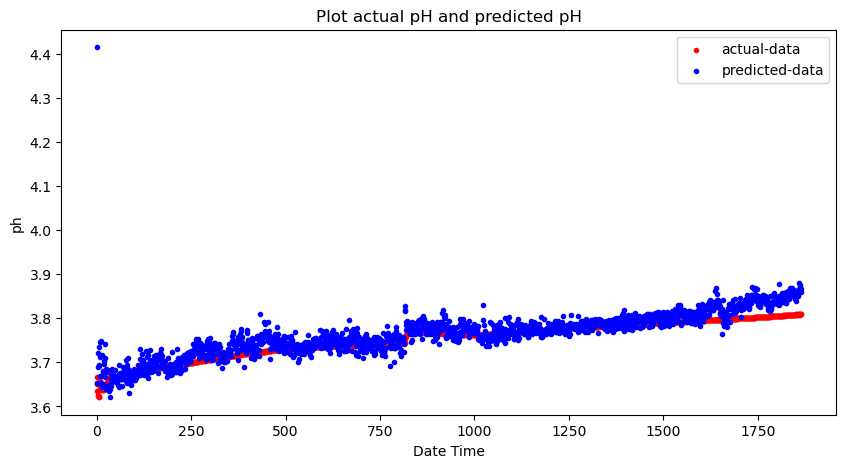

In [432]:
plt.figure(figsize=(10, 5))
# index = 0
plt.scatter(range(len(Y_train_input)), Y_train_input, marker='.', color="red", label="actual-data")
plt.scatter(range(len(y_pred)), y_pred, marker='.', color="blue", label = "predicted-data")


plt.xlabel('Date Time')
plt.ylabel('ph')
plt.title(f'Plot actual pH and predicted pH')
plt.legend()
plt.show()

In [434]:
y_pred = model.predict(X_test)
# y_actual = Y_test_input[1]
y_pred = y_pred.flatten()
y_pred

39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 443us/step


array([4.1816816, 4.1163106, 4.102153 , ..., 3.7381816, 3.7234402,
       3.712368 ], dtype=float32)

In [436]:
y_pred.shape, Y_test_input.shape

((1245,), (1245,))

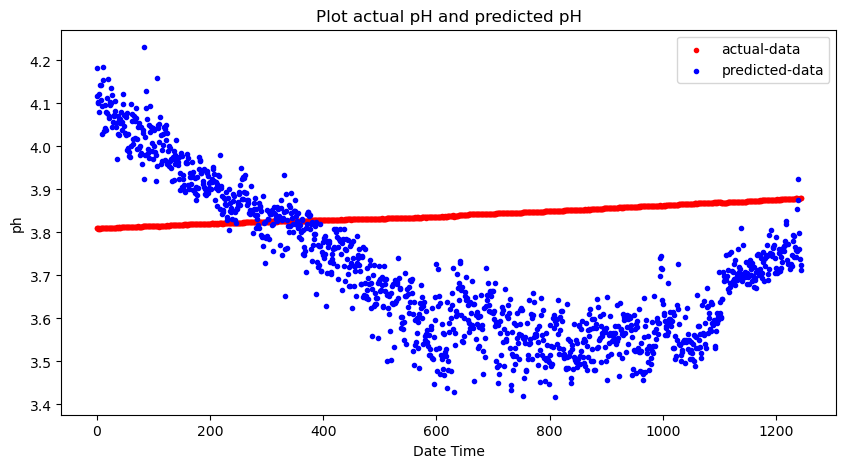

In [438]:
plt.figure(figsize=(10, 5))
# index = 0
plt.scatter(range(len(Y_test_input)), Y_test_input, marker='.', color="red", label="actual-data")
plt.scatter(range(len(y_pred)), y_pred, marker='.', color="blue", label = "predicted-data")


plt.xlabel('Date Time')
plt.ylabel('ph')
plt.title(f'Plot actual pH and predicted pH')
plt.legend()
plt.show()